In [1]:
%matplotlib inline

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

import tensorflow as tf

from tensorflow.io import read_file
from tensorflow.image import decode_jpeg

# Title

1. Create map-style dataset.
    - Create records `(filepath, class)`. The `filepath` is in a way a proxy to the data.
    - Read records using `tf.data.Dataset.from_tensor_slices()`.
1. Preprocess images.
    - Create function that preprocesses a single image.
        - read the bytes in the file
        - decode the raw bytes using jpg encoding
    - `dataset.map(func)`

## Heading

In [61]:
DATASET_DIR = Path().home() / 'Desktop' / 'datasets' / 'natural_images'

In [84]:
unique_labels = [item.name for item in DATASET_DIR.glob('*')]
unique_labels

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [114]:
records = []
labels = []

for el in DATASET_DIR.glob('*/*'):
    records.append(el.as_posix())
    labels.append(el.parent.name)

records[:2], labels[:2]

(['C:/Users/a1056968/Desktop/datasets/natural_images/airplane/airplane_0000.jpg',
  'C:/Users/a1056968/Desktop/datasets/natural_images/airplane/airplane_0001.jpg'],
 ['airplane', 'airplane'])

In [128]:
dataset = tf.data.Dataset.from_tensor_slices(records)

In [129]:
for el in dataset.take(2):
    print(el)

tf.Tensor(b'C:/Users/a1056968/Desktop/datasets/natural_images/airplane/airplane_0000.jpg', shape=(), dtype=string)
tf.Tensor(b'C:/Users/a1056968/Desktop/datasets/natural_images/airplane/airplane_0001.jpg', shape=(), dtype=string)


## Heading

In [130]:
def preprocess_image(filepath):
    file_bytes = read_file(filepath)
    image = decode_jpeg(file_bytes)
    return image

tf.Tensor(
[[[222 239 229]
  [222 239 229]
  [223 240 230]
  ...
  [204 217 210]
  [205 218 211]
  [203 216 209]]

 [[221 238 228]
  [221 238 228]
  [222 239 229]
  ...
  [205 220 213]
  [202 215 208]
  [202 217 210]]

 [[221 238 228]
  [221 238 228]
  [222 239 229]
  ...
  [197 214 208]
  [202 217 210]
  [201 218 210]]

 ...

 [[148 128 104]
  [147 127 103]
  [145 127 103]
  ...
  [124  99  77]
  [124  99  77]
  [123  98  76]]

 [[131 111  87]
  [123 103  79]
  [111  93  71]
  ...
  [135 110  88]
  [135 110  88]
  [134 109  87]]

 [[137 117  93]
  [125 105  81]
  [109  91  69]
  ...
  [139 114  92]
  [141 116  94]
  [139 114  92]]], shape=(104, 300, 3), dtype=uint8)


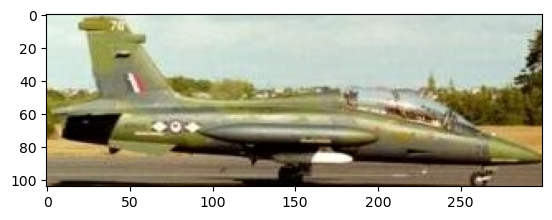

In [131]:
# Display the first image after preprocessing
first_image = [_ for _ in dataset.map(preprocess_image).take(1)][0]
print(first_image)
plt.imshow(first_image.numpy())

## Off-topic

In [107]:
b'\xE6\x97\xA5\xE6\x9C\xAC'.decode('utf-8')

'日本'